In this file I will work on the analysis of the plant growth form in the __filtered_MIS_species.txt__ dataset.

First I analyse the trait that appear more than once in the same observation, which should not happen (FOR ALL TRAITS, NOT ONLY PLANT GROWTH FORM).
Then I focus specifically on PFG.

I will explore the distribution of the different growth forms and remove the ones that are not suitable (e.g. numerical or duplicate).
Numerical are removed with code, duplicates are identified and (IF FEASIBLE) removed manually to see which one needs to be removed. For example there is a dataset in TRY that stores twice PGF (Plant Growth Form), one for standardized and one for attributed.

I started doing this in the file __popular_trait_analysis.ipynb__ but I do it in a separate file to be clearer.

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
with open('./support_files/trait_id_list.txt', 'r') as openfile:
    trait_ids = openfile.read().splitlines()

print(f"There are {len(trait_ids)} traits in total\n")

#mapping them to int because they were read as strings
trait_ids = list(map(lambda x : int(x), trait_ids))

There are 16 traits in total



In [ ]:
#specifing encoding='latin' is necessary or you get an error
top3_species_top_traits = pd.read_csv('./support_files/top3_species_top_traits.txt', sep='\t', encoding='latin')

print("Total:", len(top3_species_top_traits))

#clear outliers: refer to the documentation obtained with the data request to better understand
#only keeping the measurement that have a value included in a range of 4 standard deviations. The rest are likely outliers or wrong.
#also keep the rows with no value in ErrorRisk, because that is metadata

#500 measurements dropped.
top3_species_top_traits = top3_species_top_traits[(top3_species_top_traits['ErrorRisk'] < 4.0) | (top3_species_top_traits['ErrorRisk'].isnull())]

print("After removing outliers:", len(top3_species_top_traits))

#now remove the duplicates. Again, refer to the documentation for more information
#4032 observations removed
top3_species_top_traits = top3_species_top_traits[top3_species_top_traits['OrigObsDataID'].isnull()]

#Note that duplicates are only referred to trait measurements.
#Therefore removing rows marked as "duplicates" might leave in the dataframe rows related to the single observation (eg. location)
#For these values, TraitName is not present. The information is located in the "DataName" column.
#If exploration is necessary, refer to the "ObservationID" of the original dataframe

print("After removing duplicates:", len(top3_species_top_traits))

#Related to what I mentioned above, now I only keep data related to the trait measurements. No metadata.
trait_measurements = top3_species_top_traits[top3_species_top_traits['TraitID'].isin(trait_ids)]

trait_measurements[:5]

Total: 116532
After removing outliers: 116032
After removing duplicates: 112000


C:\Users\guido\AppData\Local\Temp\ipykernel_4072\3856632118.py:2: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  top3_species_top_traits = pd.read_csv('top3_species_top_traits.txt', sep='\t', encoding='latin')


,LastName,FirstName,DatasetID,Dataset,SpeciesName,AccSpeciesID,AccSpeciesName,ObservationID,ObsDataID,TraitID,...,Replicates,StdValue,UnitName,RelUncertaintyPercent,OrigObsDataID,ErrorRisk,Reference,Comment,StdValueStr,Unnamed: 28
9,Craine,Joseph,10,Roots Of the World (ROW) Database,Dactylis glomerata,16700,Dactylis glomerata,19150,482854,13.0,...,NaN,458.50000,mg/g,NaN,NaN,0.776812,"Craine, J. M., W. G. Lee, W. J. Bond, R. J. Wi...",C concentration,NaN,NaN
15,Craine,Joseph,10,Roots Of the World (ROW) Database,Dactylis glomerata,16700,Dactylis glomerata,19194,483824,13.0,...,NaN,416.20000,mg/g,NaN,NaN,1.267950,"Craine, J. M., W. G. Lee, W. J. Bond, R. J. Wi...",C concentration,NaN,NaN
20,Craine,Joseph,10,Roots Of the World (ROW) Database,Dactylis glomerata,16700,Dactylis glomerata,19216,484308,14.0,...,NaN,27.80000,mg/g,NaN,NaN,1.177140,"Craine, J. M., W. G. Lee, W. J. Bond, R. J. Wi...",unadjusted N concentration,NaN,NaN
28,Craine,Joseph,130,Global 15N Database,Dactylis glomerata,16700,Dactylis glomerata,19514,491120,42.0,...,NaN,NaN,NaN,NaN,NaN,NaN,"Craine, J. M., A. J. Elmore, M. P. M. Aidar, M...",Growth form,NaN,NaN
29,Craine,Joseph,130,Global 15N Database,Dactylis glomerata,16700,Dactylis glomerata,19514,491121,14.0,...,NaN,15.91335,mg/g,NaN,NaN,2.152440,"Craine, J. M., A. J. Elmore, M. P. M. Aidar, M...",% dry mass,NaN,NaN


In [15]:
trait_measurements_1 = trait_measurements[['DatasetID', 'AccSpeciesName', 'ObservationID', 'TraitID', 'TraitName', 'OrigValueStr', 'StdValue', 'UnitName']]

trait_measurements_1[:5]
#I keep both Original value and Standardized value because for non-numerical traits there is no standardized value.


,DatasetID,AccSpeciesName,ObservationID,TraitID,TraitName,OrigValueStr,StdValue,UnitName
9,10,Dactylis glomerata,19150,13.0,Leaf carbon (C) content per leaf dry mass,45.85,458.50000,mg/g
15,10,Dactylis glomerata,19194,13.0,Leaf carbon (C) content per leaf dry mass,41.62,416.20000,mg/g
20,10,Dactylis glomerata,19216,14.0,Leaf nitrogen (N) content per leaf dry mass,2.78,27.80000,mg/g
28,130,Dactylis glomerata,19514,42.0,Plant growth form,Herbaceous Monocot,NaN,NaN
29,130,Dactylis glomerata,19514,14.0,Leaf nitrogen (N) content per leaf dry mass,1.591335,15.91335,mg/g


In [ ]:
# Group by ObservationID and TraitID, and count how many times each combination appears (size). 
#Then turn the result back into a dataframe instead of a series with reset_index with a new column named "count" that stores
#the number of times each combination (obs, trait) appears
duplicate_traits = trait_measurements_1.groupby(['ObservationID', 'TraitID']).size().reset_index(name='count')

duplicate_traits[:5]

,ObservationID,TraitID,count
0,19150,13.0,1
1,19194,13.0,1
2,19216,14.0,1
3,19514,14.0,1
4,19514,42.0,1


In [ ]:
#Keep only duplicates (to identify them)
duplicates = duplicate_traits[duplicate_traits['count'] > 1]

duplicates
#1571 times there is the same trait more than once in the individual observation (should not happen)

,ObservationID,TraitID,count
747,930359,3106.0,3
753,930366,3106.0,3
759,930379,3106.0,3
764,940949,403.0,2
770,940968,403.0,2
...,...,...,...
12831,6006196,42.0,2
12834,6006197,42.0,2
12837,6006198,42.0,2
12840,6006199,42.0,2


In [ ]:
# Optional: Merge to see the full original rows that are duplicates
duplicate_rows = trait_measurements.merge(duplicates, on=['ObservationID', 'TraitID'], how='inner')

duplicate_rows['ObservationID'].unique()
#1284 observation with duplicates

array([ 930359,  930366,  930379, ..., 6006198, 6006199, 6241349],
      shape=(1284,))

In [ ]:
duplicate_pgf = duplicates[duplicates['TraitID']==42]

duplicate_pgf

#578 observations have more than one Plant Growth Form measurement

,ObservationID,TraitID,count
859,941326,42.0,4
861,941327,42.0,4
862,941959,42.0,4
864,943369,42.0,4
953,1043810,42.0,3
...,...,...,...
12828,6006195,42.0,2
12831,6006196,42.0,2
12834,6006197,42.0,2
12837,6006198,42.0,2


Now let's see how many observation have both PLANT GROWTH FORM measurement and at least one other measurement.

In [29]:
obs_counts = trait_measurements['ObservationID'].nunique()
print("Number of unique observations: ", obs_counts)


Number of unique observations:  6483


In [45]:
trait_counts = trait_measurements.groupby('ObservationID')['TraitID'].nunique().reset_index(name='trait_count')
trait_counts

#nunique makes it so that even if the same trait appears more than once for the same observation, it still gets counted once.

,ObservationID,trait_count
0,19150,1
1,19194,1
2,19216,1
3,19514,2
4,19519,2
...,...,...
6478,6487798,4
6479,6487799,4
6480,6487800,4
6481,6487801,4


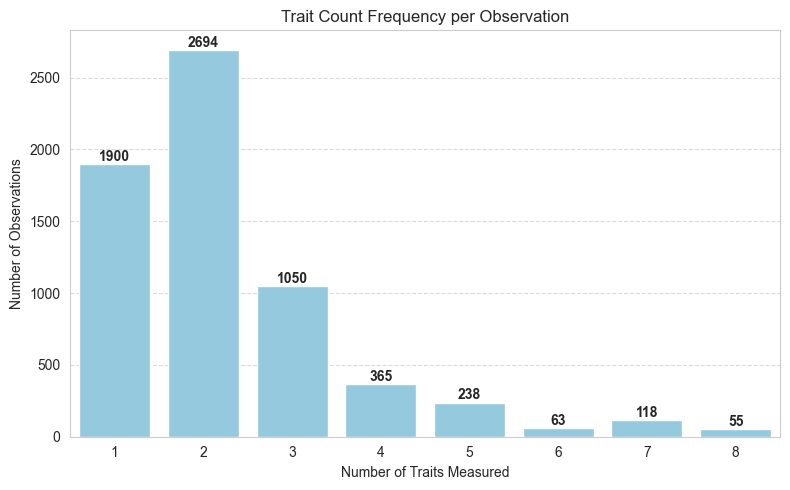

In [40]:
# Calculate frequency of each trait count
trait_count_freq = trait_counts['trait_count'].value_counts().sort_index()

sns.set_style("whitegrid")  # White background with light gridlines

# Create the plot
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=trait_count_freq.index, y=trait_count_freq.values, color='skyblue')

# Add value labels on top of bars
for index, value in enumerate(trait_count_freq.values):
    ax.text(index, value + 1, str(value), ha='center', va='bottom', fontweight='bold')

# Aesthetics
plt.title('Trait Count Frequency per Observation')
plt.xlabel('Number of Traits Measured')
plt.ylabel('Number of Observations')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
#How many of the observations extracted before countain Plant Growth Form?
has_trait_42 = trait_measurements[trait_measurements['TraitID'] == 42]['ObservationID'].unique()

has_trait_42 

array([  19514,   19519,   21962, ..., 6427773, 6427774, 6427883],
      shape=(2549,))

In [ ]:
# Keep only those with trait count >= 2
obs_with_multiple_traits = trait_counts[trait_counts['trait_count'] >= 2]

# Now check which of those also had trait 42
result = obs_with_multiple_traits[obs_with_multiple_traits['ObservationID'].isin(has_trait_42)]

# Count how many such observations there are
count = len(result)
print("Number of observations with trait 42 and at least one other trait:", count)

#Observations with both Plant Growth Form and at least another trait
result # 1730/6483 observations

#This means that only 1730 observations can have analysis performed according to a different plant growth form. And that

Number of observations with trait 42 and at least one other trait: 1730


,ObservationID,trait_count
3,19514,2
4,19519,2
5,21962,2
6,23537,2
7,23662,2
...,...,...
6429,6361703,2
6430,6361704,2
6431,6361705,2
6432,6361706,2


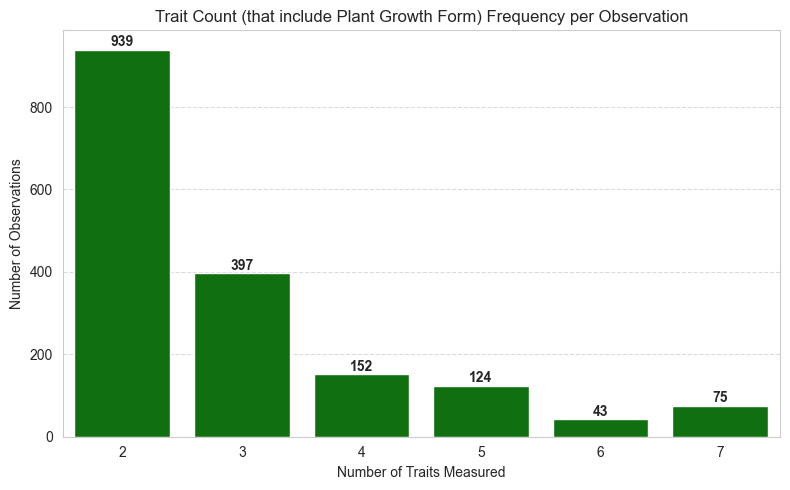

In [44]:
# Use only the ObservationIDs from 'result'
trait_count_result = trait_counts[trait_counts['ObservationID'].isin(result['ObservationID'])]

# Calculate frequency of each trait count
trait_count_freq_with_pgf = trait_count_result['trait_count'].value_counts().sort_index()

# Create the plot
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=trait_count_freq_with_pgf.index, y=trait_count_freq_with_pgf.values, color='green')

# Add value labels on top of bars
for index, value in enumerate(trait_count_freq_with_pgf.values):
    ax.text(index, value + 1, str(value), ha='center', va='bottom', fontweight='bold')

# Aesthetics
plt.title('Trait Count (that include Plant Growth Form) Frequency per Observation')
plt.xlabel('Number of Traits Measured')
plt.ylabel('Number of Observations')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()